In [14]:
import numpy as np
from HestonFunctions import Heston_explicit_bf, HestonCallClosedForm
import matplotlib.pyplot as plt

In [15]:
def compare(dt = 1/3000):
    #print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

    # Define the range of S0 and v0
    S0_range = np.linspace(0, 200, 41)
    v0_range = np.linspace(0, 1, 21)

    # Create a meshgrid of S0 and v0
    S0, v0 = np.meshgrid(S0_range, v0_range)

    # Initialize the HestonPrice matrix
    U_exact = np.zeros((len(v0_range), len(S0_range)))

    # Calculate the HestonPrice matrix
    for i in range(len(v0_range)):
        for j in range(len(S0_range)):
            if S0_range[j] == 0:
                U_exact[i][j] = 0
            else:
                U_exact[i][j] = HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range[i], r=0.03, tau=1, S0=S0_range[j], K=100)

    U_explicit, U_time = Heston_explicit_bf(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=dt, S0=200, I=40, J=20, K=100)

    return U_exact, U_explicit, U_time


In [16]:
U_exact_3, U_explicit_3, U_time_3 = compare(dt=1/3000)

print(U_exact_3.shape)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   (21, 41)


In [7]:
print(U_explicit_3.shape)

(41, 21)


Text(0, 0.5, 'Volume difference')

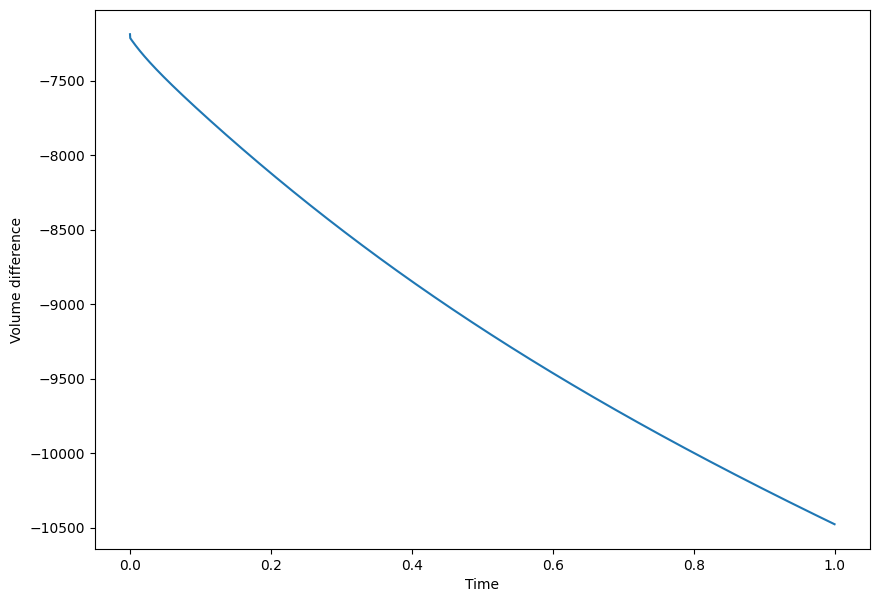

In [8]:
def cal_vol(U_exact, U_explicit, dS, dV):
    U_exact_vol = np.sum(U_exact)*dS*dV
    U_explicit_vol = np.sum(U_explicit)*dS*dV

    return U_exact_vol - U_explicit_vol

volume = np.zeros(len(U_time_3))
for n in range(len(U_time_3)):
    volume[n] = cal_vol(U_exact_3, U_time_3[n], 5, 0.05)
    # print(volume[n], end="-----")

fig = plt.figure(figsize=(10, 7))
time = np.linspace(0, 1, 3000)
plt.plot(time, volume, label='Volume')
plt.xlabel('Time')
plt.ylabel('Volume difference')

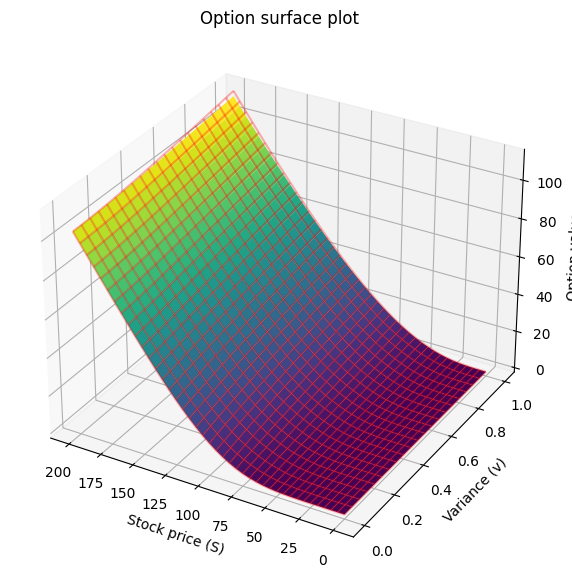

In [17]:
# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 41)
v0_range = np.linspace(0, 1, 21)

# Create a meshgrid of S0 and v0
S0, v0 = np.meshgrid(S0_range, v0_range)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S0, v0, U_exact_3, cmap='viridis', edgecolor='none', label='exact solution')
ax.plot_wireframe(S0, v0, U_explicit_3.T, color = 'r', alpha = 0.3, label='explicit solution')
ax.set_title('Option surface plot')
ax.invert_xaxis()
ax.set_xlabel('Stock price (S)')
ax.set_ylabel('Variance (v)')
ax.set_zlabel('Option value')
# ax.legend()
# plt.show()
plt.savefig('option-surface-comparison.png', dpi = 300)

Text(0, 0.5, 'U')

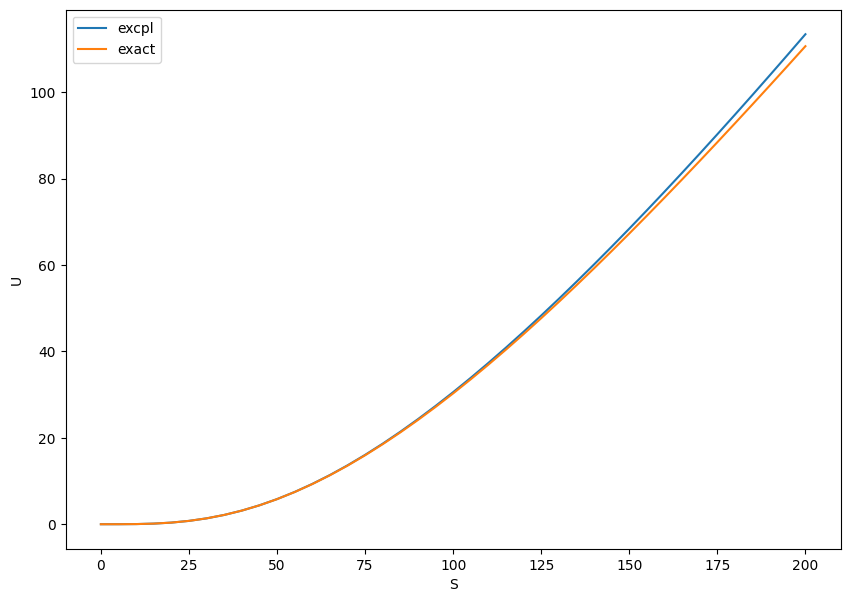

In [10]:
fig = plt.figure(figsize=(10, 7))
time = np.linspace(0, 1, 3000)
plt.plot(S0_range, U_explicit_3.T[:][-1], label='excpl')
plt.plot(S0_range, U_exact_3[:][-1], label='exact')
plt.legend()
plt.xlabel('S')
plt.ylabel('U')

In [11]:
# fig = plt.figure(figsize=(10, 7))
# v0_range = np.linspace(0, 1, 21)
# time = np.linspace(0, 1, 3000)
# plt.plot(v0_range, U_explicit_3.T[:, -1], label='excpl')
# plt.plot(v0_range, U_exact_3[: , -1], label='exact')
# plt.legend()
# plt.xlabel('v')
# plt.ylabel('U')

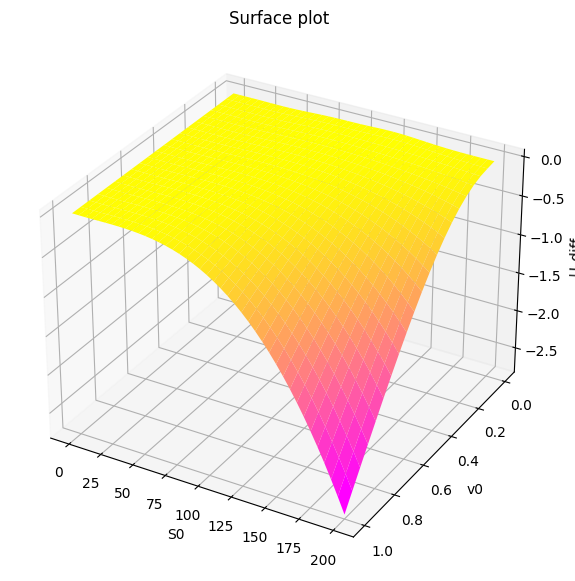

In [12]:
U_diff_3 = U_exact_3 - U_explicit_3.T

fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S0, v0, U_diff_3, cmap='spring', edgecolor='none')
# ax.plot_wireframe(S0, v0, U_explicit.T, color = 'r', alpha = 0.3)
ax.set_title('Surface plot')
ax.invert_yaxis()
ax.set_xlabel('S0')
ax.set_ylabel('v0')
ax.set_zlabel('U_diff')
plt.show()

compare with dt=1/400

In [35]:
U_exact_4, U_explicit_4, U_time_4 = compare(dt=1/4000)
print(U_exact_4.shape)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   (21, 41)


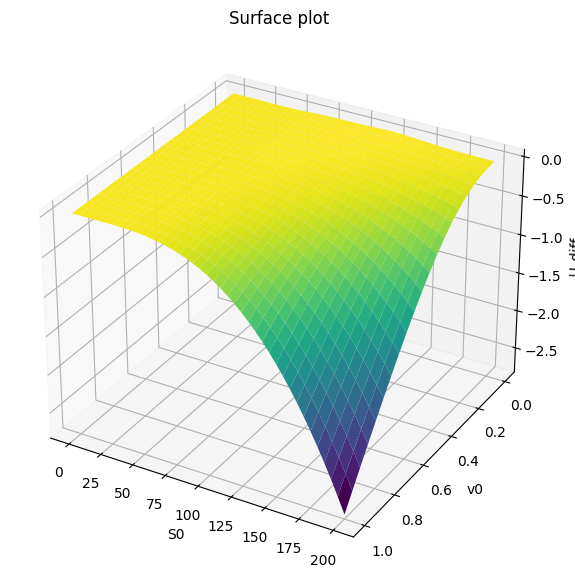

In [36]:
U_diff_4 = U_exact_4 - U_explicit_4.T

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S0, v0, U_diff_4, cmap='viridis', edgecolor='none')
# ax.plot_wireframe(S0, v0, U_explicit.T, color = 'r', alpha = 0.3)
ax.set_title('Surface plot')
ax.invert_yaxis()
ax.set_xlabel('S0')
ax.set_ylabel('v0')
ax.set_zlabel('U_diff')
plt.show()

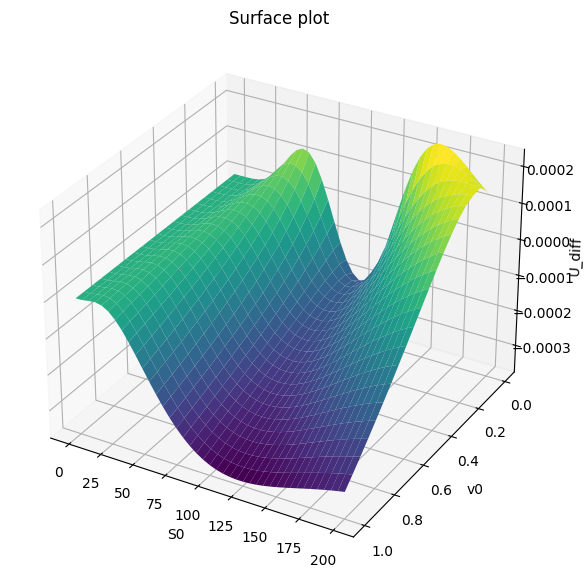

In [37]:
# difference between the two dt-s

U_diff = U_diff_3 - U_diff_4

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S0, v0, U_diff, cmap='viridis', edgecolor='none')
# ax.plot_wireframe(S0, v0, U_explicit.T, color = 'r', alpha = 0.3)
ax.set_title('Surface plot')
ax.invert_yaxis()
ax.set_xlabel('S0')
ax.set_ylabel('v0')
ax.set_zlabel('U_diff')
plt.show()

L-inf error

In [39]:
linf_error = np.max(np.abs(U_explicit_4.T - U_exact_4))

print("Linf Error:", linf_error)

Linf Error: 2.7697349726845317


In [40]:
linf_error = np.max(np.abs(U_explicit_3.T - U_exact_3))

print("Linf Error:", linf_error)

Linf Error: 2.7700372078818134


In [8]:
# dt = 1/500
U_exact_15, U_explicit_15, U_time_15 = compare(dt=1/1500)

linf_error = np.max(np.abs(U_explicit_15.T - U_exact_15))

print("\nLinf Error 1/500:", linf_error)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   

d:\UvA\year_2\P2-Adv-Comp_Fin\Heston-FD\HestonFunctions.py:95: RuntimeWarning: overflow encountered in scalar add
  U_n[ns][j] = ( -U_n[ns-2][j] + 4*U_n[ns-1][j] + 2*ds)/3
d:\UvA\year_2\P2-Adv-Comp_Fin\Heston-FD\HestonFunctions.py:95: RuntimeWarning: invalid value encountered in scalar add
  U_n[ns][j] = ( -U_n[ns-2][j] + 4*U_n[ns-1][j] + 2*ds)/3
d:\UvA\year_2\P2-Adv-Comp_Fin\Heston-FD\HestonFunctions.py:92: RuntimeWarning: invalid value encountered in scalar subtract
  U_n[i][j] = A[i][j]*U[i][j] + B[i][j]*(U[i-1][j-1] - U[i-1][j+1] - U[i+1][j-1] + U[i+1][j+1]) + C[i][j]*U[i-1][j] + D[i][j]*U[i+1][j] + E[i][j]*U[i][j-1] + F[i][j]*U[i][j+1]


100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   
Linf Error 1/500: nan


In [42]:
# dt = 1/6000
U_exact_6, U_explicit_6, U_time_6 = compare(dt=1/6000)

linf_error = np.max(np.abs(U_explicit_6.T - U_exact_6))

print("\nLinf Error 1/6000:", linf_error)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

In [43]:
# dt = 1/20000
U_exact_20, U_explicit_20, U_time_20 = compare(dt=1/20000)

linf_error = np.max(np.abs(U_explicit_20.T - U_exact_20))

print("\nLinf Error 1/20000:", linf_error)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

In [44]:
# dt = 1/25000
U_exact_25, U_explicit_25, U_time_25 = compare(dt=1/25000)

linf_error = np.max(np.abs(U_explicit_25.T - U_exact_25))

print("\nLinf Error 1/25000:", linf_error)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

Relative errors 

In [3]:
# Calculate the relative error
def rel_err(explicit_solution, exact_solution):
    linf_error = np.max(np.abs(explicit_solution - exact_solution))

    # Handle boundary conditions - assuming boundary points are at the edges of the array
    interior_exact_solution = exact_solution[1:-1, 1:-1]  # Excluding boundary points

    # Calculate U_Linf (maximum of absolute values in the exact solution, excluding boundaries)
    u_linf = np.max(np.abs(interior_exact_solution))

    # Calculate relative error
    relative_error = linf_error / u_linf
    return relative_error*100

In [53]:
print("Relative Error 1/3000:", rel_err(U_explicit_3.T, U_exact_3), "%")

Relative Error 1/3000: 2.6218912388323803 %


In [54]:
print("Relative Error 1/4000:", rel_err(U_explicit_4.T, U_exact_4), "%")

Relative Error 1/4000: 2.621605167651255 %


In [55]:
print("Relative Error 1/6000:", rel_err(U_explicit_6.T, U_exact_6), "%")

Relative Error 1/6000: 2.6213191257551953 %


In [56]:
print("Relative Error 1/20000:", rel_err(U_explicit_20.T, U_exact_20), "%")

Relative Error 1/20000: 2.620918716308649 %


In [57]:
print("Relative Error 1/25000:", rel_err(U_explicit_25.T, U_exact_25), "%")

Relative Error 1/25000: 2.6208843981039145 %
